In [69]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load Data
train_data  = pd.read_csv("regression/train.csv")
test_data = pd.read_csv("regression/test.csv")
train_data

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
995,39,female,23.275,3,no,northeast,7986.47525
996,39,female,34.100,3,no,southwest,7418.52200
997,63,female,36.850,0,no,southeast,13887.96850
998,33,female,36.290,3,no,northeast,6551.75010


In [70]:
# Quality Control
train_data.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [71]:
train_data.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
train_data.describe()

,age,bmi,children,charges
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,39.615000,30.86338,1.080000,13075.755883
std,14.153908,6.04744,1.198765,11985.924552
min,18.000000,15.96000,0.000000,1121.873900
25%,27.000000,26.60000,0.000000,4719.683425
50%,40.000000,30.59000,1.000000,9283.021300
75%,52.000000,35.11250,2.000000,15882.795437
max,64.000000,50.38000,5.000000,63770.428010


In [73]:
# Integer Encoding and One Hot Encoding
train_data["gender"].replace(to_replace=["female", "male"], value=[0, 1], inplace=True)
train_data["smoker"].replace(to_replace=["yes", "no"], value=[1, 0], inplace=True)
train_data = pd.get_dummies(train_data, prefix="region_", columns=["region"])
headers = train_data.columns.tolist()
headers = headers[:5] + headers[6:] + [headers[5]]
train_data = train_data[headers]
train_data

,age,gender,bmi,children,smoker,region__northeast,region__northwest,region__southeast,region__southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
995,39,0,23.275,3,0,1,0,0,0,7986.47525
996,39,0,34.100,3,0,0,0,0,1,7418.52200
997,63,0,36.850,0,0,0,0,1,0,13887.96850
998,33,0,36.290,3,0,1,0,0,0,6551.75010


In [74]:
# Integer Encoding and One Hot Encoding
test_data["gender"].replace(to_replace=["female", "male"], value=[0, 1], inplace=True)
test_data["smoker"].replace(to_replace=["yes", "no"], value=[1, 0], inplace=True)
test_data = pd.get_dummies(test_data, prefix="region_", columns=["region"])
test_data = test_data[headers]
test_data

,age,gender,bmi,children,smoker,region__northeast,region__northwest,region__southeast,region__southwest,charges
0,30,1,22.990,2,1,0,1,0,0,17361.76610
1,24,1,32.700,0,1,0,0,0,1,34472.84100
2,24,1,25.800,0,0,0,0,0,1,1972.95000
3,48,1,29.600,0,0,0,0,0,1,21232.18226
4,47,1,19.190,1,0,1,0,0,0,8627.54110
...,...,...,...,...,...,...,...,...,...,...
145,52,1,32.775,3,0,0,1,0,0,11289.10925
146,60,1,32.800,0,1,0,0,0,1,52590.82939
147,20,0,31.920,0,0,0,1,0,0,2261.56880
148,55,1,21.500,1,0,0,0,0,1,10791.96000


In [75]:
# x, y splitting
X_train = train_data[headers[:-1]]
y_train = train_data["charges"]
X_test = test_data[headers[:-1]]
y_test = test_data["charges"]
X_train.insert(0, "Ones", 1)
X_test.insert(0, "Ones", 1)

# 6.1 

#### w_hat = inverse(phi.T @ phi) @ phi.T @ y equals pseudo_inverse(phi) @ y

In [76]:
#convert X features to phi (basis functions) matrix
phi_train = X_train.copy()
phi_test = X_test.copy()
phi_train.loc[:, "age"] = X_train.loc[:, "age"] ** 2 
phi_test.loc[:, "age"] = X_test.loc[:, "age"] ** 2

In [77]:
# Calculate w_hat which is argmin_w(J(w))
w_hat = np.linalg.pinv(X_train.values) @ y_train
w_hat = w_hat.reshape((w_hat.shape[0], 1))
w_hat

array([[-10265.47558833],
       [   264.25843027],
       [  -288.53386146],
       [   339.90865802],
       [   410.23628453],
       [ 23832.3784891 ],
       [ -1817.78531587],
       [ -2257.68184123],
       [ -3109.07519302],
       [ -3080.93323821]])

In [78]:
# Predict outputs for test features
def predict(X, w):
    y_hat = X @ w
    return y_hat
y_hat = predict(phi_test, w_hat)
y_hat

,0
0,257488.247054
1,173525.304751
2,147347.556522
3,605277.776921
4,578308.161122
...,...
145,714114.319267
146,972676.788739
147,104030.099040
148,793465.081297


In [79]:
def cost(y_test, y_hat):
    error = y_test - y_hat
    squared_error = error ** 2
    sse = squared_error.sum()
    return sse
cost(y_test, y_hat[0])

43472466662997.33

# 6.2

In [80]:
phi_train

,Ones,age,gender,bmi,children,smoker,region__northeast,region__northwest,region__southeast,region__southwest
0,1,361,0,27.900,0,1,0,0,0,1
1,1,324,1,33.770,1,0,0,0,1,0
2,1,784,1,33.000,3,0,0,0,1,0
3,1,1089,1,22.705,0,0,0,1,0,0
4,1,1024,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,1,1521,0,23.275,3,0,1,0,0,0
996,1,1521,0,34.100,3,0,0,0,0,1
997,1,3969,0,36.850,0,0,0,0,1,0
998,1,1089,0,36.290,3,0,1,0,0,0


In [81]:
y_train

0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
995     7986.47525
996     7418.52200
997    13887.96850
998     6551.75010
999     5267.81815
Name: charges, Length: 1000, dtype: float64

In [82]:
# Standardizing Data 
headers = phi_train.columns.to_list()
for col in ["age", "bmi", "children"]:
    min_col = phi_train[col].min()
    max_col = phi_train[col].max()
    mean = phi_train[col].mean()
    std = phi_train[col].std()
    phi_train[col] = (phi_train[col] - mean) / std
for col in ["age", "bmi", "children"]:
    min_col = phi_test[col].min()
    max_col = phi_test[col].max()
    mean = phi_test[col].mean()
    std = phi_test[col].std()
    phi_test[col] = (phi_test[col] - mean)/std
phi_train.describe()

,Ones,age,gender,bmi,children,smoker,region__northeast,region__northwest,region__southeast,region__southwest
count,1000.0,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.0,2.858824e-17,0.505000,1.188338e-14,-8.082424e-17,0.196000,0.247000,0.231000,0.278000,0.244000
std,0.0,1.000000e+00,0.500225,1.000000e+00,1.000000e+00,0.397167,0.431483,0.421683,0.448238,0.429708
min,1.0,-1.268113e+00,0.000000,-2.464411e+00,-9.009274e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,-9.128089e-01,0.000000,-7.049892e-01,-9.009274e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,-1.486849e-01,1.000000,-4.520590e-02,-6.673536e-02,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,8.198490e-01,1.000000,7.026311e-01,7.674566e-01,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,2.041044e+00,1.000000,3.227253e+00,3.270033e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
def predict(X, w):
    y_hat = X @ w
    return y_hat

def cost(y_test, y_hat):
    error = y_test - y_hat
    squared_error = error ** 2
    sse = squared_error.sum()
    return sse

In [84]:
n, d = phi_train.shape
learning_rate = 0.001
w = np.zeros((d, 1))
n_iteration = 100_000
epoch = 1
best_weight = None
best_error = float('inf')
for t in range(1, n_iteration+1):
    i = t % n
    if i == 0:
        print(f">>epoch {epoch} | cost {cost(y_test, predict(phi_test, w)[0])}")
        epoch += 1
    x = phi_train.iloc[i].values.reshape((1, d))
    y = y_train.iloc[i]
    w = w + learning_rate * x.T * (y - x@w)
    y_hat = predict(phi_test, w)
    error = cost(y_test, y_hat[0])
    if error < best_error:
        best_error = error
        best_weight = w
print("minimum cost:", best_error)
print("best weights:\n", best_weight)
    

>>epoch 1 | cost 19708667032.7261
>>epoch 2 | cost 14786311466.003078
>>epoch 3 | cost 12554746966.996471
>>epoch 4 | cost 11023528167.731506
>>epoch 5 | cost 9898128841.502113
>>epoch 6 | cost 9061794702.829035
>>epoch 7 | cost 8438985530.247275
>>epoch 8 | cost 7974629733.644092
>>epoch 9 | cost 7627860380.4411545
>>epoch 10 | cost 7368367590.827873
>>epoch 11 | cost 7173712374.193759
>>epoch 12 | cost 7027293667.82103
>>epoch 13 | cost 6916825117.27726
>>epoch 14 | cost 6833204749.430954
>>epoch 15 | cost 6769680599.905533
>>epoch 16 | cost 6721236131.70374
>>epoch 17 | cost 6684137737.068796
>>epoch 18 | cost 6655601420.436838
>>epoch 19 | cost 6633547051.733078
>>epoch 20 | cost 6616416984.637029
>>epoch 21 | cost 6603042022.618708
>>epoch 22 | cost 6592542250.653578
>>epoch 23 | cost 6584253569.591
>>epoch 24 | cost 6577673199.616534
>>epoch 25 | cost 6572419199.049297
>>epoch 26 | cost 6568200350.033894
>>epoch 27 | cost 6564793721.154835
>>epoch 28 | cost 6562027921.605906
>>ep

# 6.3

In [85]:
phi_train

,Ones,age,gender,bmi,children,smoker,region__northeast,region__northwest,region__southeast,region__southwest
0,1,-1.235654,0,-0.490022,-0.900927,1,0,0,0,1
1,1,-1.268113,1,0.480636,-0.066735,0,0,0,1,0
2,1,-0.864558,1,0.353310,1.601649,0,0,0,1,0
3,1,-0.596983,1,-1.349063,-0.900927,0,0,1,0,0
4,1,-0.654007,1,-0.327970,-0.900927,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,1,-0.217991,0,-1.254809,1.601649,0,1,0,0,0
996,1,-0.217991,0,0.535205,1.601649,0,0,0,0,1
997,1,1.929627,0,0.989943,-0.900927,0,0,0,1,0
998,1,-0.596983,0,0.897342,1.601649,0,1,0,0,0


In [86]:
n, d = phi_train.shape
boundaries = np.linspace(0, n, num= 6, dtype=np.int16)
lambda_costs = {}
lambda_weights = {}
for lambda_exp in [-4, -3, -2, -1, 0, 1]:
    costs = []
    for idx in range(len(boundaries) - 1):
        c_x_valid = phi_train.iloc[boundaries[idx]: boundaries[idx+1]]
        c_x_train = phi_train.drop(np.r_[boundaries[idx]:boundaries[idx+1]], axis=0)
        c_y_valid = y_train.iloc[boundaries[idx]: boundaries[idx+1]]
        c_y_train = y_train.drop(np.r_[boundaries[idx]:boundaries[idx+1]], axis=0)
        w = np.linalg.inv((c_x_train.T @ c_x_train) + (10**lambda_exp) * np.identity(d)) @ c_x_train.T @ c_y_train
        w = w.values.reshape((d, 1))
        c_y_hat = predict(c_x_valid, w)[0]
        c_cost = cost(c_y_valid, c_y_hat)
        costs.append(c_cost)
    lambda_costs[str(lambda_exp)] = np.mean(costs)
    lambda_weights[str(lambda_exp)] = w
lambda_costs
    

{'-4': 7079711287.904966,
 '-3': 7079710089.165428,
 '-2': 7079698203.0013485,
 '-1': 7079589345.059461,
 '0': 7079485149.329951,
 '1': 7162700538.615109}

Text(0.5, 0, 'Lambda')

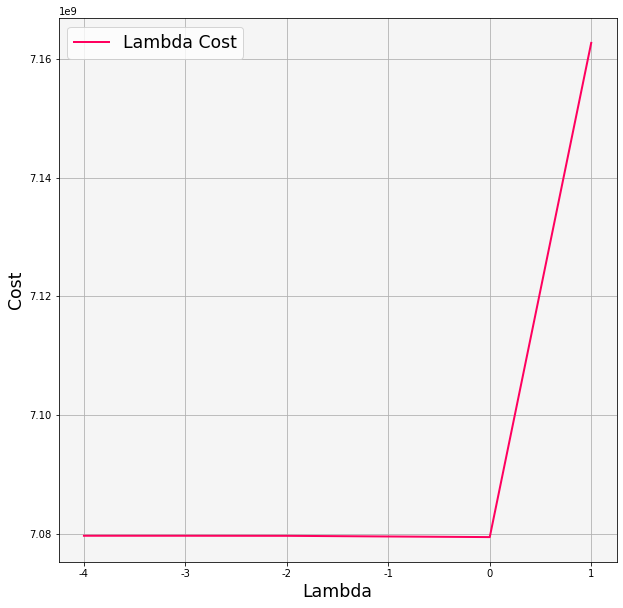

In [87]:
fig, ax= plt.subplots(figsize=(10, 10))
ax.plot(lambda_costs.keys(), lambda_costs.values(), label="Lambda Cost", color="#FF005E", linewidth=2)
ax.grid(True)
ax.legend(fontsize="xx-large")
ax.set_facecolor('#f5f5f5')
ax.set_ylabel("Cost", fontsize="xx-large")
ax.set_xlabel("Lambda", fontsize="xx-large")

In [88]:
best_lambda = min(lambda_costs, key=lambda_costs.get)
best_lambda

'0'

In [89]:
w = lambda_weights[best_lambda]
train_cost = cost(y_train, predict(X_train, w)[0])
test_cost = cost(y_test, predict(X_test, w)[0])
print("Train cost:", train_cost)
print("Test cost:", test_cost)

Train cost: 47161505628584.99
Test cost: 6924324901770.429
